In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk

In [3]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
df = pd.read_csv('/content/Movies_Train.csv')
df.head()

text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1

In [5]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [6]:
df[df.duplicated(keep='first')]

text  label
2164   I find it rather useless to comment on this "m...      0
3236   An absolutely atrocious adaptation of the wond...      0
3428   When I first saw this film it was not an impre...      0
3652   Before I watched this tv movie I did not know ...      1
3787   What a clunker!<br /><br />It MUST have been m...      0
...                                                  ...    ...
39229  I Enjoyed Watching This Well Acted Movie Very ...      1
39246  You do realize that you've been watching the E...      0
39508  (Spoilers)<br /><br />Oh sure it's based on Mo...      0
39681  It's been a long time since I last saw a movie...      0
39746  Goodnight, Mister Tom begins in an impossibly ...      0

[277 rows x 2 columns]

In [7]:
def clean_review(x):
  str = ' '.join(word for word in x.split() if word.lower() not in stopwords.words('english'))
  return str

In [8]:
df['text'] = df['text'].apply(clean_review)
df.head()

text  label
0  grew (b. 1965) watching loving Thunderbirds. m...      0
1  put movie DVD player, sat coke chips, expectat...      0
2  people know particular time past like feel nee...      0
3  Even though great interest Biblical movies, bo...      0
4  Im die hard Dads Army fan nothing ever change ...      1

In [9]:
## wordcloud
from wordcloud import WordCloud

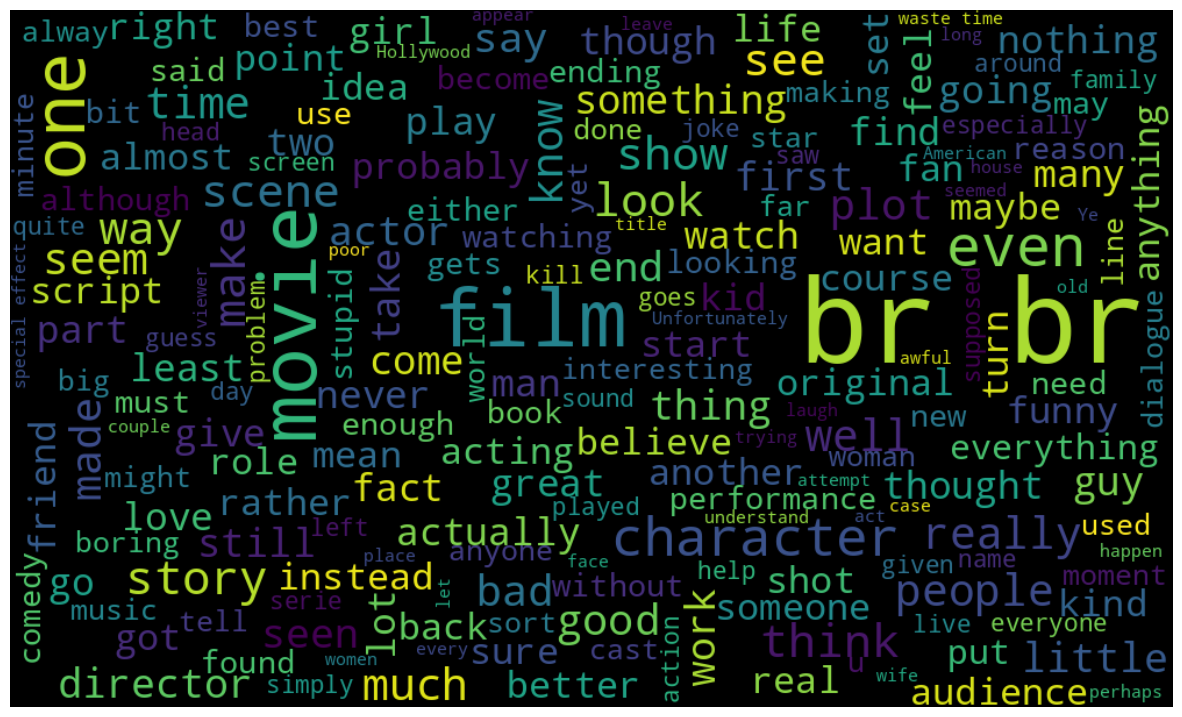

In [10]:
reviews = ' '.join(word for word in df['text'][df['label']==0]. astype(str))
wc = WordCloud(height=600, width=1000, max_font_size=100)
plt.figure(figsize= (15,12))
plt.imshow(wc.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()


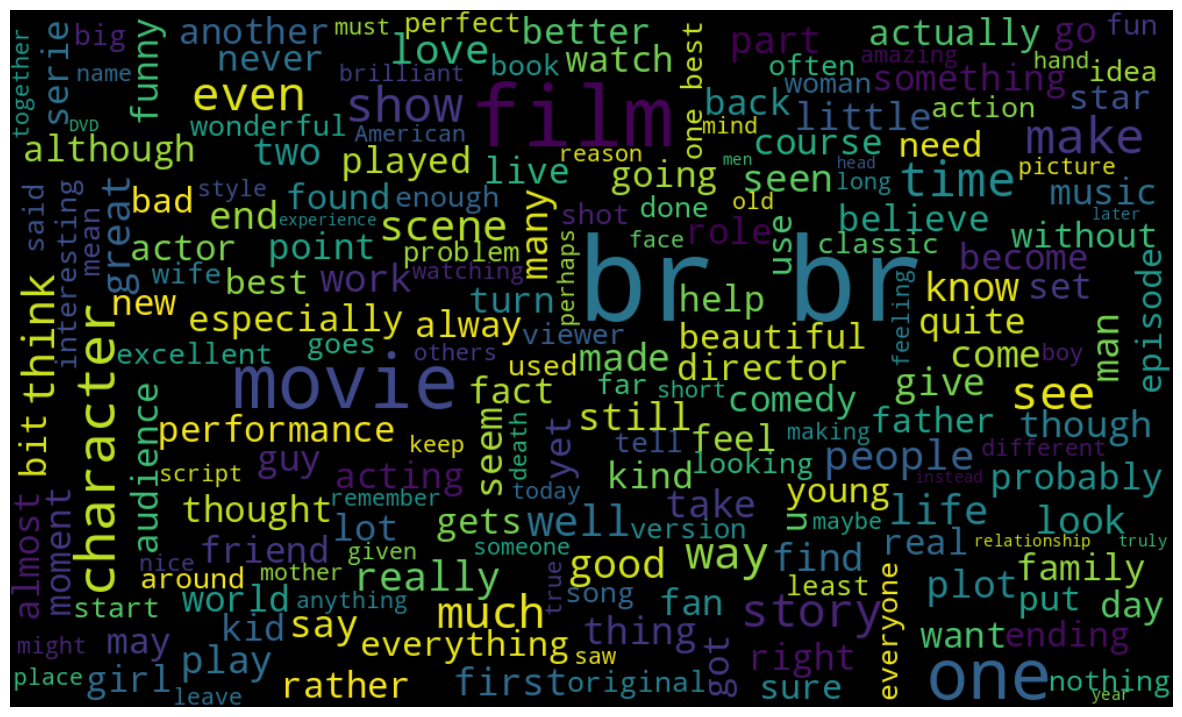

In [11]:
reviews = ' '.join(word for word in df['text'][df['label']==1]. astype(str))
wc = WordCloud(height=600, width=1000, max_font_size=100)
plt.figure(figsize= (15,12))
plt.imshow(wc.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)


In [13]:
reviews = cv.fit_transform(df['text']).toarray()


Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(reviews, df['label'], train_size=0.8, random_state=4)



In [16]:
log_r.fit(x_train,y_train)

LogisticRegression()

In [17]:
ycap_train = log_r.predict(x_train)
ycap_test = log_r.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix, r2_score, ConfusionMatrixDisplay

In [19]:
print('train_acc:', r2_score(y_train, ycap_train)*100)
print('test_acc:', r2_score(y_test, ycap_test)*100)

train_acc: 60.98749984760743
test_acc: 52.948823720593


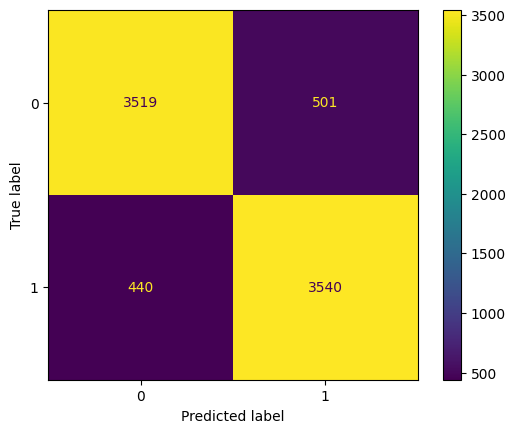

In [20]:
cm = confusion_matrix(y_test, ycap_test, labels=log_r.classes_)
dis = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = log_r.classes_)
dis.plot()
plt.show()

In [ ]:
import pickle as pk

In [ ]:
pk.dump(log_r, open('log_r.pk1', 'wb'))

In [ ]:
reviews

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0746816 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.37367367, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Decision Tree Classifier

In [21]:

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)

dtc_train = dtc.predict(x_train)
dtc_test = dtc.predict(x_test)

from sklearn.metrics import accuracy_score
print('train_acc:', accuracy_score(y_train, dtc_train)*100)
print('test_acc:', accuracy_score(y_test, dtc_test)*100)


train_acc: 100.0
test_acc: 71.55


In [22]:
from sklearn.model_selection import GridSearchCV
est = DecisionTreeClassifier(random_state=0)
params = {'criterion': ['gini','entropy'],
          'max_depth': [1,2,3,4,5]}
gd = GridSearchCV(est, params, scoring='accuracy',cv=5)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [23]:
dtc = DecisionTreeClassifier(random_state=0, criterion= 'gini', max_depth= 5)
dtc.fit(x_train, y_train)

dtc_train = dtc.predict(x_train)
dtc_test = dtc.predict(x_test)

from sklearn.metrics import accuracy_score
print('train_acc:', accuracy_score(y_train, dtc_train)*100)
print('test_acc:', accuracy_score(y_test, dtc_test)*100)


train_acc: 69.83125
test_acc: 69.15


Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train,y_train)

rfc_train = rfc.predict(x_train)
rfc_test = rfc.predict(x_test)

print('train_acc:', accuracy_score(y_train,rfc_train)*100)
print('test_acc:', accuracy_score(y_test, rfc_test)*100)

train_acc: 100.0
test_acc: 83.78750000000001


In [ ]:
est = RandomForestClassifier(random_state=0)
p_grid = {'n_estimators':list(range(1,26))}

gd = GridSearchCV(est, p_grid, scoring='accuracy', cv=5)
gd.fit(x_train,y_train)
gd.best_params_

{'n_estimators': 25}

In [25]:
rfc = RandomForestClassifier(random_state=0, n_estimators=75)
rfc.fit(x_train,y_train)

rfc_train = rfc.predict(x_train)
rfc_test = rfc.predict(x_test)

print('train_acc:', accuracy_score(y_train,rfc_train)*100)
print('test_acc:', accuracy_score(y_test, rfc_test)*100)

train_acc: 100.0
test_acc: 83.65


XGBoost Classifier

In [26]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

xgb_train = xgb.predict(x_train)
xgb_test = xgb.predict(x_test)

print('train_acc:', accuracy_score(y_train, xgb_train)*100)
print('test_acc:', accuracy_score(y_test, xgb_test)*100)

train_acc: 93.91874999999999
test_acc: 85.425


In [49]:
xgb = XGBClassifier(n_estimators = 200, max_depth=3, gamma=0.1)
xgb.fit(x_train, y_train)

xgb_train = xgb.predict(x_train)
xgb_test = xgb.predict(x_test)

print('train_acc:', accuracy_score(y_train, xgb_train)*100)
print('test_acc:', accuracy_score(y_test, xgb_test)*100)

train_acc: 90.746875
test_acc: 85.775
